In [1]:
from pybaseball import statcast
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
playerid_lookup('kershaw', 'clayton')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,kershaw,clayton,477132,kersc001,kershcl01,2036,2008.0,2023.0


In [27]:

def get_pitcher_data(player_id, start_year, end_year):
    all_data = []
    for year in range(start_year, end_year + 1):
        data = statcast_pitcher(f"{year}-01-01", f"{year}-12-31", player_id)
        data['year'] = year
        all_data.append(data)
    return pd.concat(all_data, ignore_index=True)

kershaw_data = get_pitcher_data(477132, 2019, 2023)

Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data


In [43]:
pd.set_option('display.max_columns', None)
new_subset = kershaw_data[['release_speed', 
'effective_speed',
'release_pos_x',
'release_pos_y', 
'release_pos_z', 
'pfx_x', 
'pfx_z', 
'vx0', 
'vy0', 
'vz0', 
'ax',
'ay', 
'az',  
'release_spin_rate',
'spin_axis', 'pitch_type', 'year',]]
new_subset.head()

,release_speed,effective_speed,release_pos_x,release_pos_y,release_pos_z,pfx_x,pfx_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,spin_axis,pitch_type,year
0,89.3,88.2,1.32,54.71,6.44,-0.03,0.89,-2.171460,-129.805035,-5.141173,0.146645,28.502939,-21.445103,2685.0,182.0,SL,2019
1,89.4,88.8,1.27,54.54,6.47,-0.66,1.27,-2.550795,-129.891813,-9.602169,-6.794619,26.992742,-16.261352,2796.0,207.0,FF,2019
2,74.2,72.6,0.89,54.96,6.57,-0.64,-1.66,-0.361543,-107.856805,-0.448732,-4.738930,22.061924,-44.826805,2820.0,339.0,CU,2019
3,88.9,88.0,1.37,54.84,6.35,-0.32,0.92,-3.968312,-129.091289,-9.537135,-2.798790,24.859178,-20.478270,2773.0,199.0,SL,2019
4,89.3,88.7,1.29,54.51,6.45,-0.16,1.06,-4.814822,-129.712827,-8.011375,-0.731147,27.027726,-18.916573,2762.0,188.0,SL,2019


In [46]:
filtered_df = new_subset[new_subset['year'] == 2019]
print('length:', len(filtered_df))
print(filtered_df.isnull().sum())
filtered_df.head(20)

length: 2777
release_speed         96
effective_speed        0
release_pos_x         97
release_pos_y         97
release_pos_z         97
pfx_x                 97
pfx_z                 97
vx0                   97
vy0                   97
vz0                   97
ax                    97
ay                    97
az                    97
release_spin_rate    120
spin_axis             97
pitch_type            97
year                   0
dtype: int64


,release_speed,effective_speed,release_pos_x,release_pos_y,release_pos_z,pfx_x,pfx_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,spin_axis,pitch_type,year
0,89.3,88.2,1.32,54.71,6.44,-0.03,0.89,-2.171460,-129.805035,-5.141173,0.146645,28.502939,-21.445103,2685.0,182.0,SL,2019
1,89.4,88.8,1.27,54.54,6.47,-0.66,1.27,-2.550795,-129.891813,-9.602169,-6.794619,26.992742,-16.261352,2796.0,207.0,FF,2019
2,74.2,72.6,0.89,54.96,6.57,-0.64,-1.66,-0.361543,-107.856805,-0.448732,-4.738930,22.061924,-44.826805,2820.0,339.0,CU,2019
3,88.9,88.0,1.37,54.84,6.35,-0.32,0.92,-3.968312,-129.091289,-9.537135,-2.798790,24.859178,-20.478270,2773.0,199.0,SL,2019
4,89.3,88.7,1.29,54.51,6.45,-0.16,1.06,-4.814822,-129.712827,-8.011375,-0.731147,27.027726,-18.916573,2762.0,188.0,SL,2019
5,90.6,89.7,1.25,54.72,6.42,-0.39,1.15,-1.630937,-131.770386,-5.840534,-4.113856,28.154874,-18.041381,2783.0,199.0,FF,2019
6,86.8,86.0,1.32,54.72,6.42,-0.36,0.79,-1.697819,-126.280078,-5.236407,-3.469799,25.799477,-23.040314,2620.0,205.0,SL,2019
7,86.7,85.6,1.19,54.76,6.38,-0.37,0.76,-3.383466,-125.844036,-10.259872,-3.158963,25.405661,-22.412120,2650.0,206.0,SL,2019
8,91.2,90.2,1.16,54.62,6.41,-0.25,1.80,-4.325413,-132.387323,-9.435584,-1.886049,28.957333,-9.556507,2492.0,188.0,FF,2019
9,85.8,84.7,1.53,54.92,6.44,-0.17,0.60,-4.165972,-124.804560,-4.065865,-0.875100,25.278897,-25.525502,2697.0,196.0,SL,2019


In [48]:
len(filtered_df.dropna())

2657

In [47]:
kershaw_subset = kershaw_data[['release_speed', 'effective_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 
                               'year', 'pitch_type']]
kershaw_subset.head(5)

,release_speed,effective_speed,release_pos_x,release_pos_y,release_pos_z,year,pitch_type
0,89.3,88.2,1.32,54.71,6.44,2019,SL
1,89.4,88.8,1.27,54.54,6.47,2019,FF
2,74.2,72.6,0.89,54.96,6.57,2019,CU
3,88.9,88.0,1.37,54.84,6.35,2019,SL
4,89.3,88.7,1.29,54.51,6.45,2019,SL


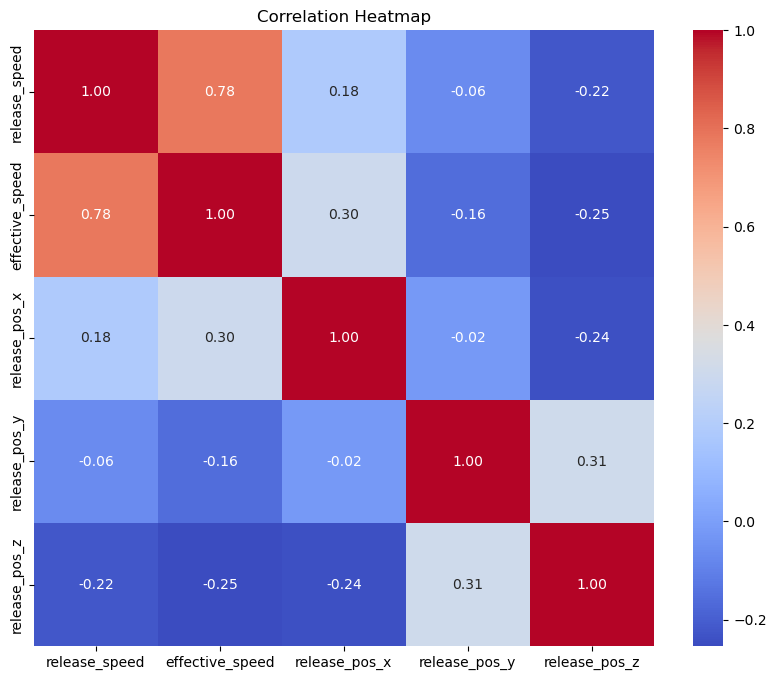

In [6]:
corr_matrix = kershaw_data[['release_speed', 'effective_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

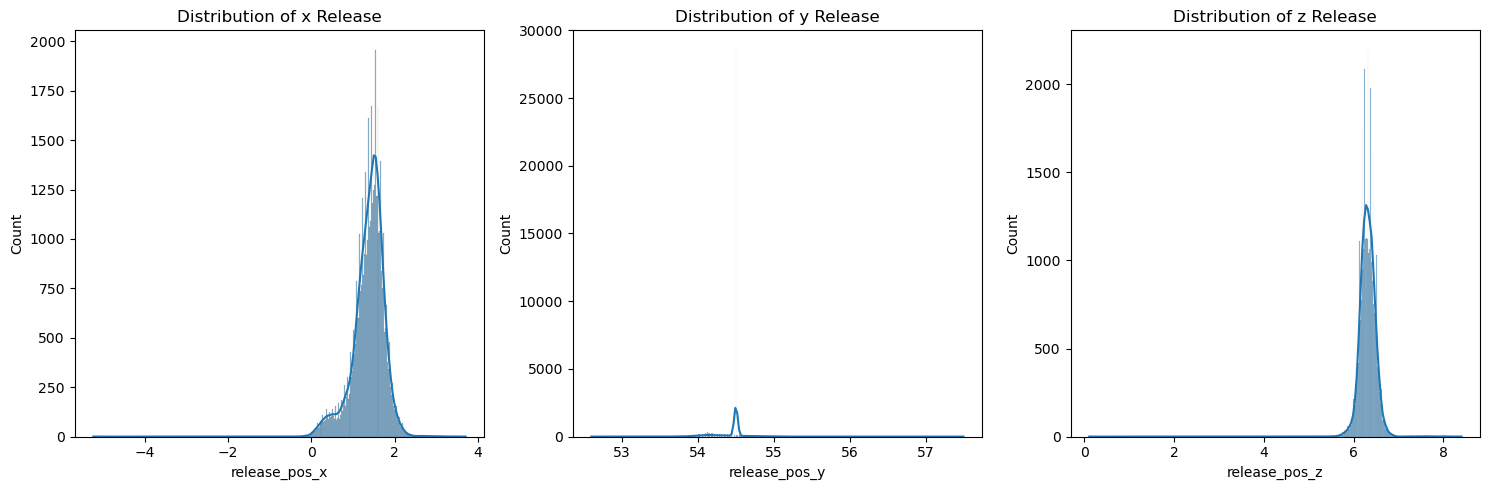

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Release Position Distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(kershaw_subset['release_pos_x'], kde=True, ax = axes[0]).set_title('Distribution of x Release')
sns.histplot(kershaw_subset['release_pos_y'], kde=True, ax = axes[1]).set_title('Distribution of y Release')
sns.histplot(kershaw_subset['release_pos_z'], kde=True, ax = axes[2]).set_title('Distribution of z Release')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Effective Speed')

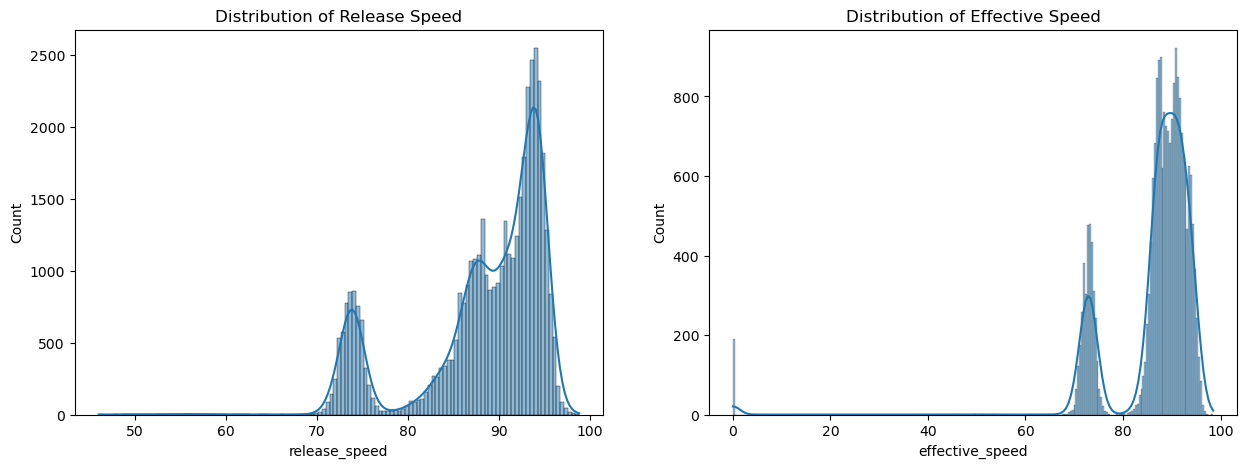

In [8]:
# Speed Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(kershaw_subset['release_speed'], kde=True, ax=axes[0]).set_title('Distribution of Release Speed')
sns.histplot(kershaw_subset['effective_speed'], kde=True, ax=axes[1]).set_title('Distribution of Effective Speed')

C:\Users\JT Herren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


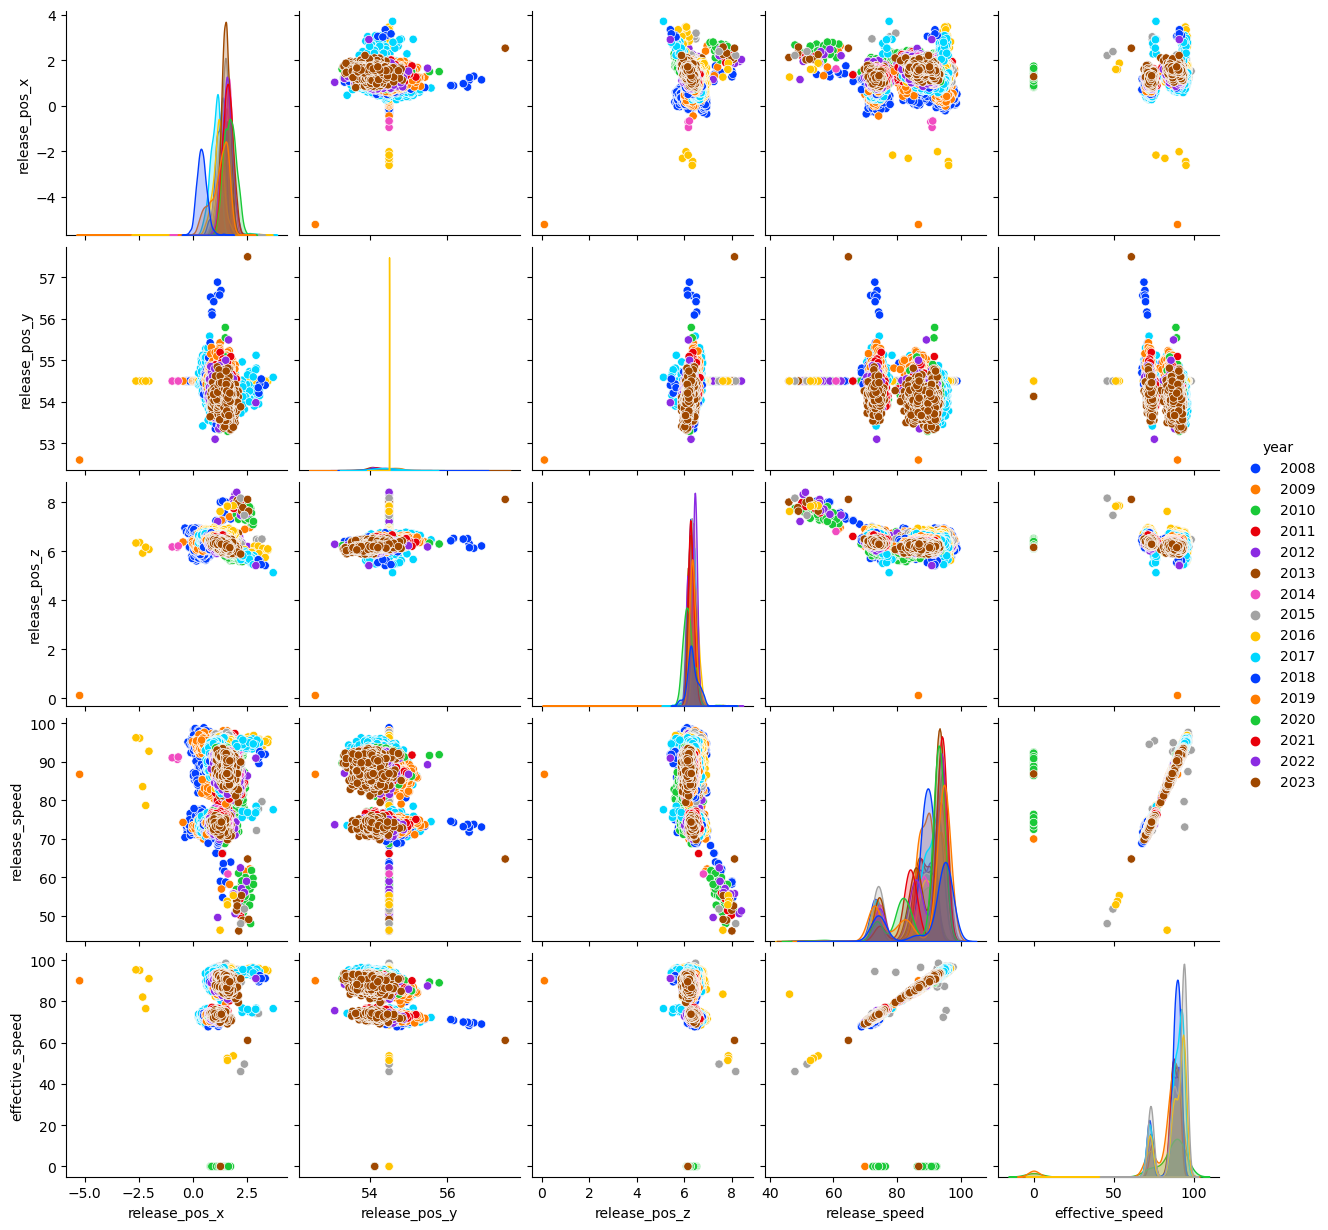

In [9]:
# Year
sns.pairplot(kershaw_subset[['release_pos_x', 'release_pos_y', 'release_pos_z', 'release_speed', 'effective_speed', 'year']], hue='year', palette='bright')
plt.show()

C:\Users\JT Herren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


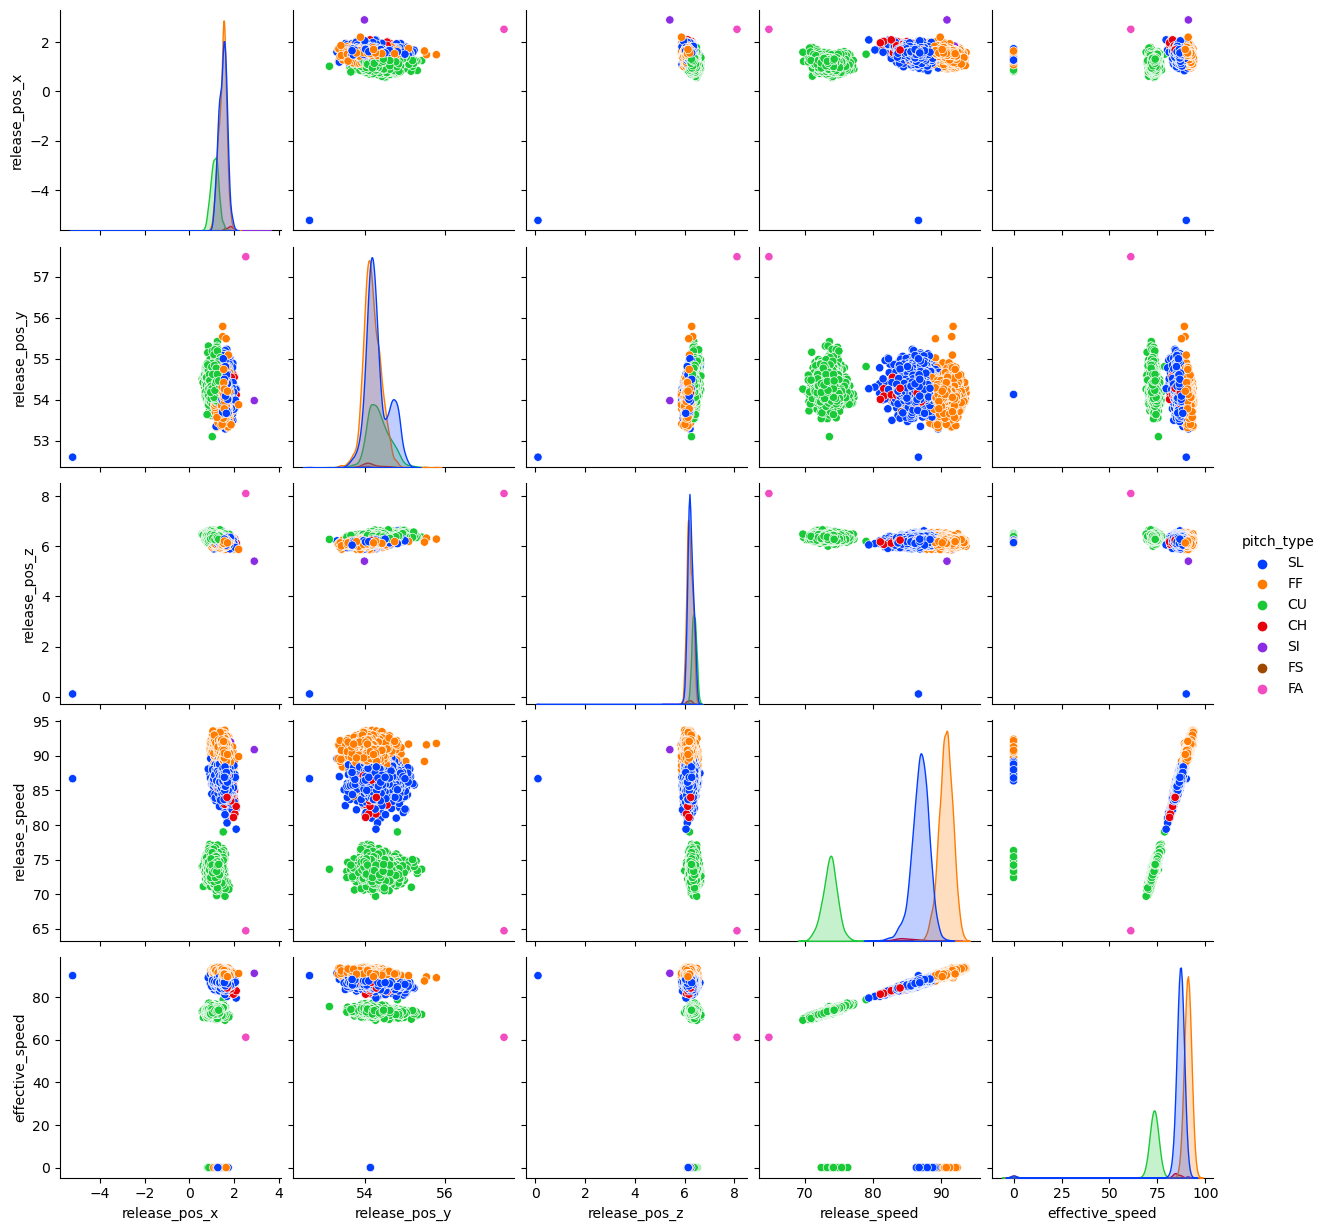

In [28]:
# Pitch Type
sns.pairplot(kershaw_subset[['release_pos_x', 'release_pos_y', 'release_pos_z', 'release_speed', 'effective_speed', 'pitch_type']], hue='pitch_type', palette='bright')
plt.show()

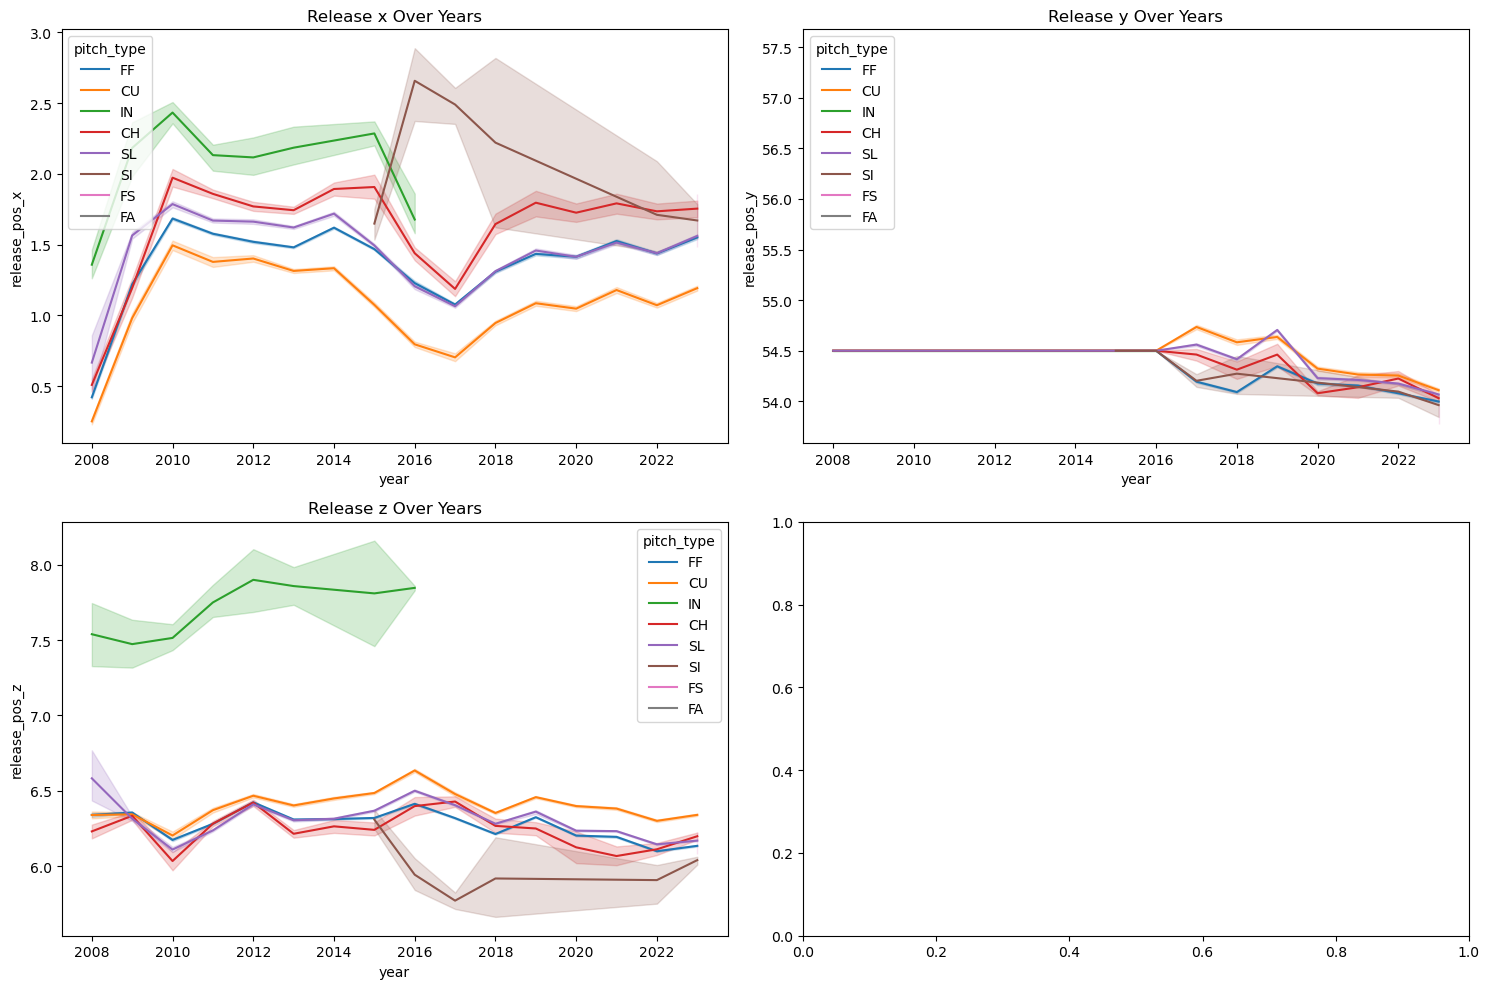

In [10]:
# Release Postion over Years
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.lineplot(data=kershaw_subset, x='year', y='release_pos_x', hue='pitch_type', ax=axes[0, 0]).set_title('Release x Over Years')
sns.lineplot(data=kershaw_subset, x='year', y='release_pos_y', hue='pitch_type', ax=axes[0, 1]).set_title('Release y Over Years')
sns.lineplot(data=kershaw_subset, x='year', y='release_pos_z', hue='pitch_type', ax=axes[1, 0]).set_title('Release z Over Years')
plt.tight_layout()
plt.show()

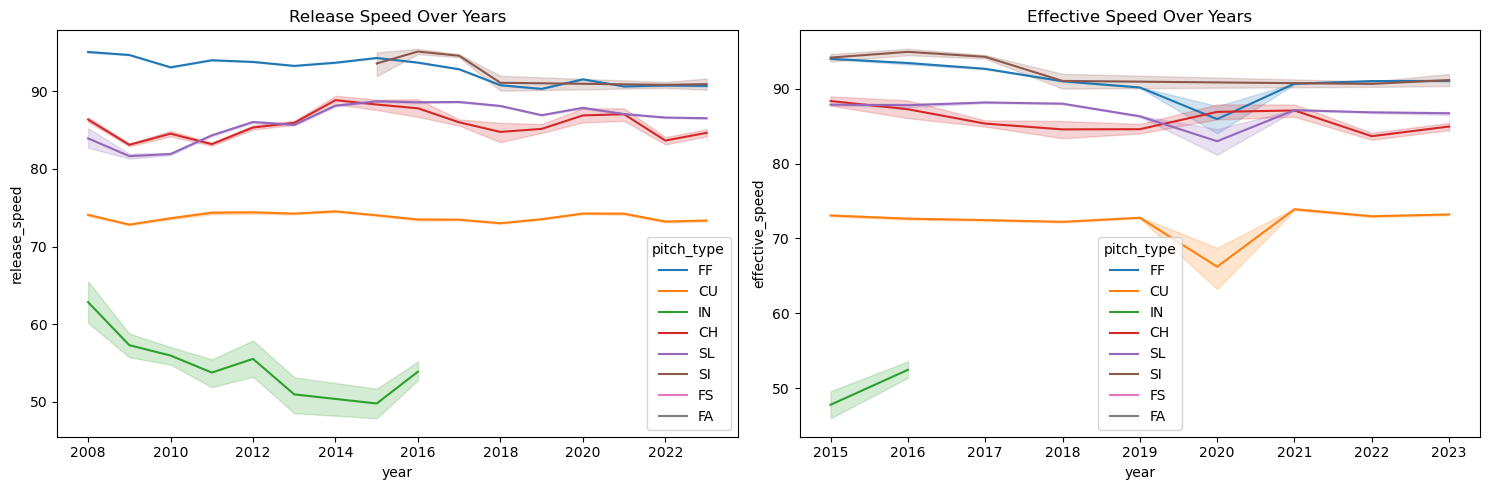

In [11]:
# Speed Over Years
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=kershaw_subset, x='year', y='release_speed', hue='pitch_type', ax=axes[0]).set_title('Release Speed Over Years')
sns.lineplot(data=kershaw_subset, x='year', y='effective_speed', hue='pitch_type', ax=axes[1]).set_title('Effective Speed Over Years')
plt.tight_layout()
plt.show()

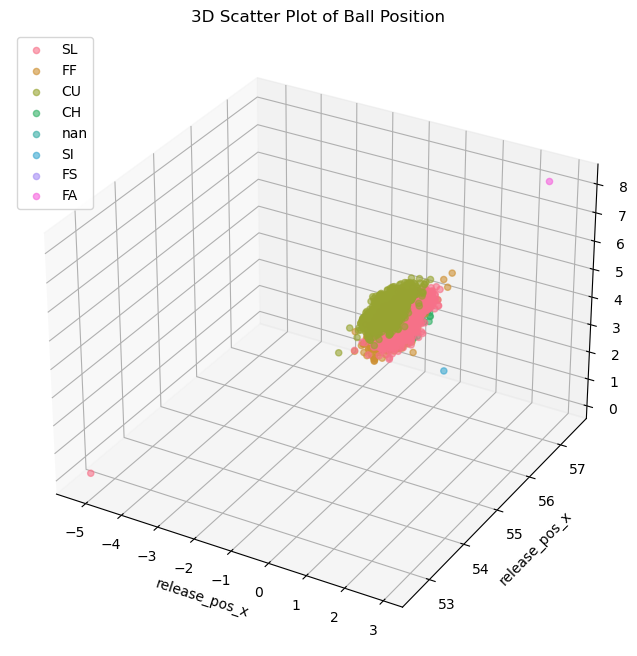

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color mapping based on pitch_type
pitch_types = kershaw_data['pitch_type'].unique()
colors = sns.color_palette("husl", len(pitch_types))
color_dict = {pitch_type: color for pitch_type, color in zip(pitch_types, colors)}

# Scatter plot in 3D
for pitch_type in pitch_types:
    subset = kershaw_data[kershaw_data['pitch_type'] == pitch_type]
    ax.scatter(subset['release_pos_x'], subset['release_pos_y'], subset['release_pos_z'], color=color_dict[pitch_type], label=pitch_type, alpha=0.6)

ax.set_xlabel('release_pos_x')
ax.set_ylabel('release_pos_x')
ax.set_zlabel('release_pos_x')
ax.set_title('3D Scatter Plot of Ball Position')
ax.legend()
plt.show()

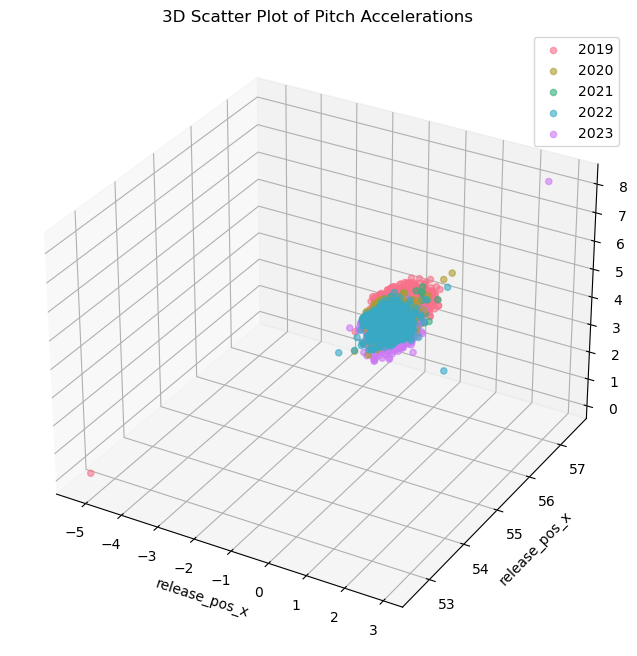

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color mapping based on pitch_type
years = kershaw_data['year'].unique()
colors = sns.color_palette("husl", len(pitch_types))
color_dict = {pitch_type: color for pitch_type, color in zip(pitch_types, colors)}

# Scatter plot in 3D
for year in years:
    subset = kershaw_data[kershaw_data['year'] == year]
    ax.scatter(subset['release_pos_x'], subset['release_pos_y'], subset['release_pos_z'], color=color_dict[year], label=year, alpha=0.6)

ax.set_xlabel('release_pos_x')
ax.set_ylabel('release_pos_x')
ax.set_zlabel('release_pos_x')
ax.set_title('3D Scatter Plot of Pitch Accelerations')
ax.legend()
plt.show()

<Axes: xlabel='effective_speed', ylabel='release_speed'>

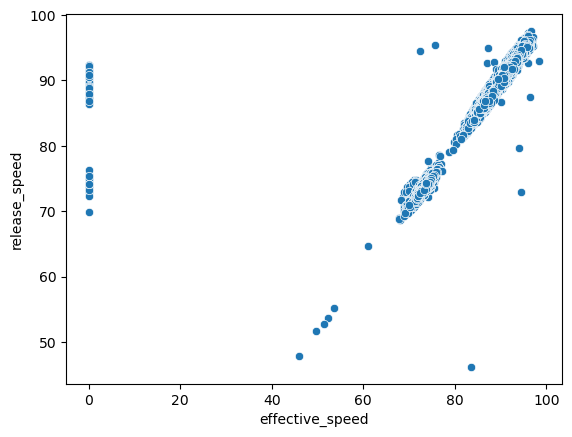

In [14]:
sns.scatterplot(x = kershaw_subset['effective_speed'], y = kershaw_subset['release_speed'])